In [1]:
import tensorflow as tf

import gempy as gp


from ipywidgets import interact, interactive
import os
import numpy as np
import sys
import timeit
import csv
import pandas as pd

import matplotlib.pyplot as plt


import tensorflow_probability as tfp
import pandas as pd
from gempy import create_data, map_series_to_surfaces
from gempy.assets.geophysics import GravityPreprocessing
tfd = tfp.distributions
sys.path.append('/Users/zhouji/Google Drive/RWTH/')
from regularModel import *
%matplotlib inline
modelName = 'model2'

Active grids: ['regular']
tf.float64


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x14d10b7d0>)

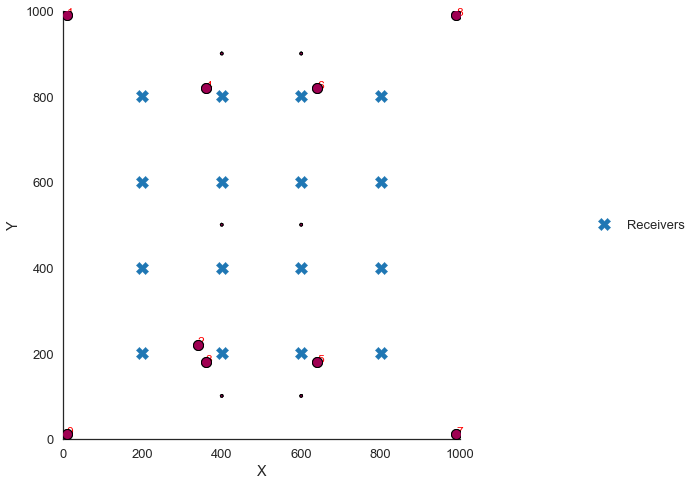

In [2]:
path = '/Users/zhouji/Google Drive/RWTH/GP_old/notebooks'
orientation_path = "/data/input_data/George_models/model2_1_orientations.csv"
surface_path = '/data/input_data/George_models/'+modelName+'_surface_points.csv'

grav_res_x = 4
grav_res_y = 4
# X = [250,300, 700,750]
# Y = [250,300, 700,750]

X = [200,400,600,800]
Y = [200,400,600,800]

# X = np.linspace(250, 750, grav_res_x)
# Y = np.linspace(250, 750, grav_res_y)
r = []
for x in X:
  for y in Y:
    r.append(np.array([x,y]))
receivers = np.array(r)


model1 = Model(path,surface_path,orientation_path,receivers = receivers,dtype='float64')
model1.plot_model()

In [3]:
mu = model1.mu_true

In [4]:
model1.scalar_field(mu)

<tf.Tensor: shape=(125032,), dtype=float64, numpy=
array([0.47154258, 0.48994284, 0.50840573, ..., 0.74136138, 0.74136138,
       0.74136138])>

In [5]:
from gempy.plot.vista import GemPyToVista
gpv = GemPyToVista(model1)
gpv.plot_surface_points(surfaces='all')
gpv.p.show()

[(2431.851652578137, 2431.851652578137, 2431.851652578137),
 (500.0, 500.0, 500.0),
 (0.0, 0.0, 1.0)]

In [6]:
import pyvista as pv
import matplotlib.colors as mcolors
from pyvista.plotting.theme import parse_color

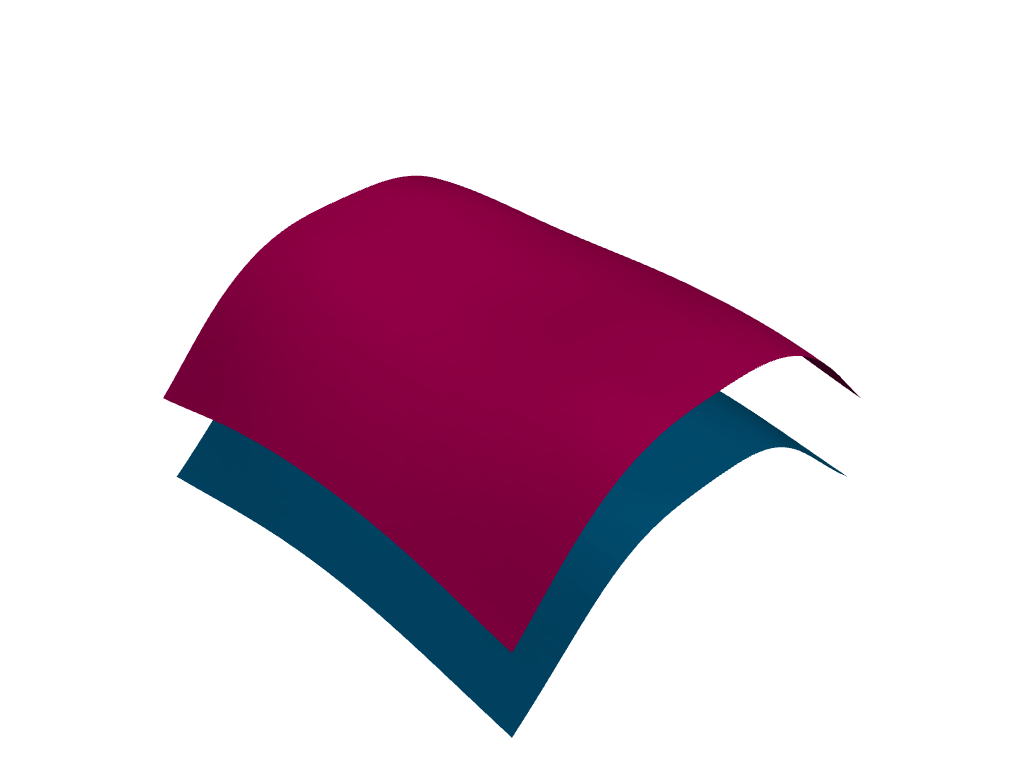

In [8]:
surfaces_df = gpv._select_surfaces_data(gpv.model._surfaces.df, 'all')
select_active = surfaces_df['isActive']
p = pv.Plotter()
cmap = mcolors.ListedColormap(list(gpv._get_color_lot(is_faults=True, is_basement=True)))
for idx, val in surfaces_df[select_active][['vertices', 'edges', 'color', 'surface', 'id']].dropna().iterrows():
            surf = pv.PolyData(val['vertices'], np.insert(val['edges'], 0, 3, axis=1).ravel())
            # surf['id'] = val['id']
            gpv.surface_poly[val['surface']] = surf
            gpv.surface_actors[val['surface']] = p.add_mesh(
                surf, parse_color(val['color']), show_scalar_bar=True,
                cmap=cmap)
p.show()
# list(self._get_color_lot(is_faults=True, is_basement=True)

In [28]:
gpv.model._surfaces.df

,surface,series,order_surfaces,isBasement,isFault,isActive,hasData,color,vertices,edges,sfai,id
1,rock2,Strat_Series,1,False,False,True,True,#9f0052,"[[10.0, 10.0, 109.4232177734375], [10.0, 14.81...","[[2, 1, 0], [3, 1, 2], [4, 3, 2], [5, 3, 4], [...",NaN,1
0,rock1,Strat_Series,2,False,False,True,True,#015482,"[[10.0, 10.0, 309.43227767944336], [10.0, 14.3...","[[2, 1, 0], [5, 4, 3], [5, 3, 1], [6, 5, 1], [...",NaN,2
2,basement,Basement_Series,1,True,False,True,False,#ffbe00,NaN,NaN,NaN,3


In [38]:
import pyvista as pv

In [9]:
gp.plot_3d(model1,show_scalar=False,show_lith = False,show_surfaces=False, notebook=False,scalar_field = 'Strat_Series')

In [13]:
model1._surfaces.df

,surface,series,order_surfaces,isBasement,isFault,isActive,hasData,color,vertices,edges,sfai,id
0,rock1,Strat_Series,1,False,False,True,True,#015482,"[[10.0, 10.0, 109.4232177734375], [10.0, 14.81...","[[2, 1, 0], [3, 1, 2], [4, 3, 2], [5, 3, 4], [...",0.741361,1
1,rock2,Strat_Series,2,False,False,True,True,#9f0052,"[[10.0, 10.0, 309.43227767944336], [10.0, 14.3...","[[2, 1, 0], [5, 4, 3], [5, 3, 1], [6, 5, 1], [...",0.563486,2
2,basement,Basement_Series,1,True,False,True,False,#ffbe00,NaN,NaN,NaN,3


In [5]:
## scalar lithology
GP = gp.plot_3d(model1,show_scalar = False,show_lith = True,show_surfaces=True, notebook=False,scalar_field = 'Strat_Series')

In [7]:
model1.geo_data._surfaces.df

,surface,series,order_surfaces,isBasement,isFault,isActive,hasData,color,vertices,edges,sfai,id
1,rock2,Strat_Series,1,False,False,True,True,#9f0052,"[[10.0, 10.0, 109.4232177734375], [10.0, 14.81...","[[2, 1, 0], [3, 1, 2], [4, 3, 2], [5, 3, 4], [...",NaN,1
0,rock1,Strat_Series,2,False,False,True,True,#015482,"[[10.0, 10.0, 309.43227767944336], [10.0, 14.3...","[[2, 1, 0], [5, 4, 3], [5, 3, 1], [6, 5, 1], [...",NaN,2
2,basement,Basement_Series,1,True,False,True,False,#ffbe00,NaN,NaN,NaN,3


In [9]:
model1.geo_data._stack

,order_series,BottomRelation,isActive,isFault,isFinite
Strat_Series,1,Erosion,True,False,False
Basement_Series,2,Erosion,False,False,False


/Users/zhouji/Documents/github/gempy/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


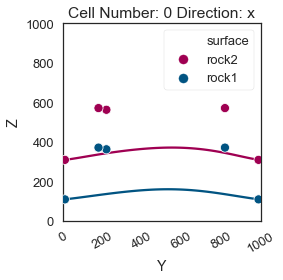

In [37]:
gp.plot_2d(model1,show_lith=False,show_boundaries=True,cell_number=0,direction ='x')

In [7]:
import pyvista as pv

In [9]:

X = [200,400,600,800]
Y = [200,400,600,800]

r = []
for x in X:
  for y in Y:
    r.append(np.array([x,y]))
receivers = np.array(r)
receivers
Z = 1000
xyz = np.meshgrid(X, Y, Z)
xy_ravel = np.vstack(list(map(np.ravel, xyz))).T

poly = pv.PolyData(xy_ravel)
geom = pv.Cone(direction=[0.0, 0.0, -1.0])

glyphs = poly.glyph(factor=30.0,geom=geom)

## scalar lithology
GP = gp.plot_3d(model1, show_surfaces=True, notebook=False,off_screen=True)

GP.p.add_mesh(glyphs, color="tan",render_points_as_spheres=True,point_size=10)
GP.set_bounds()

GP.p.show(screenshot='/Users/zhouji/Documents/Geophysics/Liang/Fig/3Dmodel.png')
# GP.p.show()

[(2441.5589662575626, 2441.5589662575626, 2449.0589662575626),
 (500.0, 500.0, 507.5),
 (0.0, 0.0, 1.0)]

In [13]:
from gempy.plot.vista import GemPyToVista

In [14]:
gpv = GemPyToVista(model1)

In [15]:
regular_grid, cmap = gpv.create_regular_mesh('lith','Default','', True)

In [40]:
model1._surfaces.df

,surface,series,order_surfaces,isBasement,isFault,isActive,hasData,color,vertices,edges,sfai,id
1,rock2,Strat_Series,1,False,False,True,True,#9f0052,"[[10.0, 10.0, 109.4232177734375], [10.0, 14.81...","[[2, 1, 0], [3, 1, 2], [4, 3, 2], [5, 3, 4], [...",NaN,1
0,rock1,Strat_Series,2,False,False,True,True,#015482,"[[10.0, 10.0, 309.43227767944336], [10.0, 14.3...","[[2, 1, 0], [5, 4, 3], [5, 3, 1], [6, 5, 1], [...",NaN,2
2,basement,Basement_Series,1,True,False,True,False,#ffbe00,NaN,NaN,NaN,3


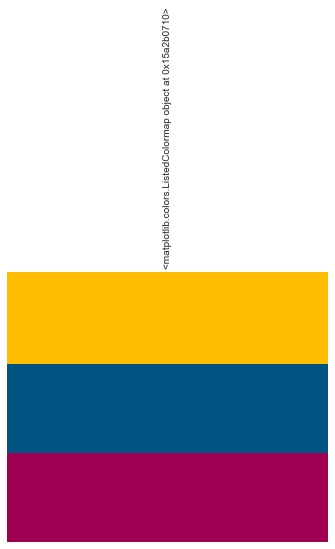

In [17]:
#!python
from pylab import *
from numpy import outer
rc('text', usetex=False)
a=outer(arange(0,1,0.01),ones(10))
figure(figsize=(10,5))
subplots_adjust(top=0.8,bottom=0.05,left=0.01,right=0.99)
maps=[cmap]
maps.sort()
l=len(maps)+1
for i, m in enumerate(maps):
    subplot(1,l,i+1)
    axis("off")
    imshow(a,aspect='auto',cmap=get_cmap(m),origin="lower")
    title(m,rotation=90,fontsize=10)

In [46]:
model1._surfaces.df

,surface,series,order_surfaces,isBasement,isFault,isActive,hasData,color,vertices,edges,sfai,id
1,rock2,Strat_Series,1,False,False,True,True,#9f0052,"[[10.0, 10.0, 109.4232177734375], [10.0, 14.81...","[[2, 1, 0], [3, 1, 2], [4, 3, 2], [5, 3, 4], [...",NaN,1
0,rock1,Strat_Series,2,False,False,True,True,#015482,"[[10.0, 10.0, 309.43227767944336], [10.0, 14.3...","[[2, 1, 0], [5, 4, 3], [5, 3, 1], [6, 5, 1], [...",NaN,2
2,basement,Basement_Series,1,True,False,True,False,#ffbe00,NaN,NaN,NaN,3


In [45]:
model1._surfaces.reset_order_surfaces()
model1._surfaces.sort_surfaces()
model1._surfaces.set_basement()

,surface,series,order_surfaces,color,id
1,rock2,Strat_Series,1,#9f0052,1
0,rock1,Strat_Series,2,#015482,2
2,basement,Basement_Series,1,#ffbe00,3


In [ ]:
model1.solutions.